## Inverse Sampling

### Goal:
Using uniform random variable to simulate other continuous random variable

### Settings:

   - cumulative distribution function(cdf):
   
       $F_Y(a) = P(Y \leq a)$
       
       ![](figures/expon.gif)
       
   - $F(Y) = U \Rightarrow Y = F^{-1}(U)$:
   
       $U$ is uniform $(0,1)$ random variable, so $F$ is a function where input is $Y$ and output is $U$.
       ![](figures/uni.gif)
   
### Proof:
    
$\begin{align}
F_Y(a) &= P(Y \leq a) \\
&= P(F^{-1}(U) \leq a) \\
&= P(U \leq F(a)) = F(a)
\end{align}$

so, if we know $F_Y$ then, we can use uniform $(0,1)$ random variable to generate variable with cdf $F_Y$

### EXAMPLE

We can using uniform$(0,1)$ random variable to generate a exponential distributed random variable.

- target distribution:
    - pdf: $f_Y(y) = \begin{cases} 
      e^{-y} & y \geq 0 \\
      0 & y < 0 
   \end{cases}$
    - cdf: $F_Y(y) = \begin{cases} 
      1- e^{-y} & y \geq 0 \\
      0 & y < 0 
   \end{cases}$
   
- input distribution:
   - pdf: $f_U(u) = \begin{cases} 
      1 & 0 \leq u \leq 1 \\
      0 & others 
   \end{cases}$
   - cdf: $F_U(u) = \begin{cases} 
      0 &  u < 0 \\
      u & 0 \leq u \leq 1 \\
      1 & u > 1
   \end{cases}$
- $F^{-1}$
   - $1-e^{-y} = u \Rightarrow y = -log(1-u)$
   - Input uniform rv to function $-log(1-u)$ then the output is exponential rv

### CODING VALIDATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import uniform

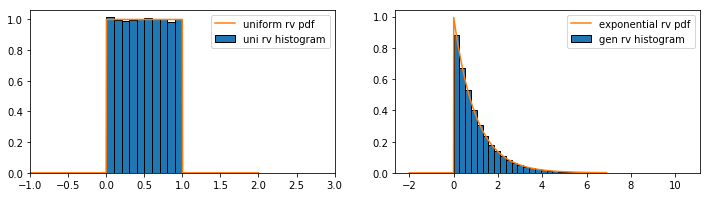

In [2]:
n_sample = 50000

# Inverse Sampling
#-----------------------------------
uni_rv = np.random.rand(n_sample)
gen_rv = -np.log(1-uni_rv)
#-----------------------------------

# Visualization
x_exp = np.linspace(-2,expon.ppf(0.999),1000)
x_uni = np.linspace(-2,2,1000)

fig = plt.figure(figsize=(12,3))
ax_uni = fig.add_subplot(1,2,1)
ax_uni.hist(uni_rv, bins=10, normed=True, edgecolor="black",label="uni rv histogram")
ax_uni.plot(x_uni, uniform.pdf(x_uni), label = "uniform rv pdf")
ax_uni.set_xlim(-1,3)
ax_uni.legend(loc=1)
ax_gen = fig.add_subplot(1,2,2)
ax_gen.hist(gen_rv, bins=40, normed=True, edgecolor="black",label="gen rv histogram")
ax_gen.plot(x_exp, expon.pdf(x_exp), label = "exponential rv pdf")
ax_gen.legend(loc=1)
plt.show()

## Acceptance-Rejection Sampling

### Goal:
using rv U with pdf uniform$(0, 1)$ and rv Y with cdf $G(y)$ to generate rv X with cdf $F(x)$

### Algorithm:

<img src="figures\flow-chart.png" alt="Drawing" style="width: 750px;"/>

1. generate a rv $Y$ with pdf $g(y)$
2. generate a uniform$(0,1)$ rv $U$ independent from $Y$
3. if $U \leq \frac{f(Y)}{cg(Y)}$ then accept $Y$ as $X$, else go back to 1

Finally the accepted $X$ has pdf $f(x)$

### Some understanding:

- $\frac{f(Y)}{cg(Y)}$ is a rv with range $(0,1)$, $A = \frac{f(Y)}{cg(Y)}$ could be considered as a rv represent the criteria
- $p = P(U \leq A) = \frac{1}{c}$ is the probability that we accept $Y$ as a $X$, which actually represents average acceptance criteria
- $N$ is iteration times, it is also a rv, which follows geometric distribution, $P(N=n) = (1-p)^{n-1}p \Rightarrow E[N] = c$
- $P(Y\leq y | U \leq \frac{f(Y)}{cg(Y)}) = \frac{P(U \leq \frac{f(Y)}{cg(Y)}| Y \leq y) P(Y \leq y)}{P(U \leq \frac{f(Y)}{cg(Y)})} = \frac{\frac{F(y)}{cG(y)} G(y)}{c^{-1}} = F(y)$

### Proof 1:
- $U$ is uniform$(0,1)$ rv
- $A = \frac{f(Y)}{cg(Y)}$ is rv with range $(0,1)$

$\begin{align}
P(U \leq A) &= \underset{U,A}{\iint} \quad f_{U,A}(u,a) \quad du da \\
&= \int_{a=0}^{a=1} \int_{u=0}^{u=a} \quad f_{U,A}(u,a) \quad du da \\
&= \int_{a=0}^{a=1} \int_{u=0}^{u=a} \quad f_{U}(u)f_{A}(a) \quad duda  \longleftarrow \text{independence}\\
&= \int_{a=0}^{a=1} \quad \int_{u=0}^{u=a} f_{U}(u)du \quad f_{A}(a) da  \\
&= \int_{a=0}^{a=1} F_{U}(a) \quad f_{A}(a) da  = \int_{a=0}^{a=1} af_{A}(a) da = E[A] \\
\end{align}$ 
![](figures\integ.png)

### Proof 2:
$\begin{align}
P(U \leq A) &= E[A] = E[\frac{f(Y)}{cg(Y)}] \\ 
&= \int_{-\infty}^{\infty} \frac{f(y)}{cg(y)} g(y) dy\\
&= \frac{1}{c} \int_{-\infty}^{\infty} f(y) dy = \frac{1}{c} \\
\end{align}$ 

### Proof 3:
$\begin{align}
P(U \leq \frac{f(Y)}{cg(Y)} | Y \leq y) &= \frac{P(U \leq \frac{f(Y)}{cg(Y)}, Y \leq y)}{P(Y \leq y)} \\
&= \frac{P(U \leq \frac{f(Y)}{cg(Y)}, Y \leq y)}{G(y)} \\
&= \frac{ \int_{-\infty}^{y} \int_{u=0}^{\frac{f(y)}{cg(y)}} f_{U,Y}(u, y) du dy }{G(y)} \\ 
&= \frac{1}{G(y)}  \int_{-\infty}^{y} \int_{u=0}^{\frac{f(y)}{cg(y)}} f_{U}(u)f_{Y}(y) du dy \\
&= \frac{1}{G(y)}  \int_{-\infty}^{y} \int_{u=0}^{\frac{f(y)}{cg(y)}} g(y) du dy \\
&= \frac{1}{G(y)}  \int_{-\infty}^{y} \int_{u=0}^{\frac{f(y)}{cg(y)}} du g(y) dy \\
&= \frac{1}{G(y)}  \int_{-\infty}^{y} \frac{f(y)}{cg(y)} g(y) dy \\
&= \frac{1}{c G(y)}  \int_{-\infty}^{y} f(y) dy \\
&= \frac{F(y)}{c G(y)} \\
\end{align}$

## EXAMPLE

### Goal:
generate gaussian distribution pdf: $f(x) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}}$

### Analysis:
1. since gaussian distribution is symmetric, if we can generate $f(x) = \frac{2}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}}, x \ge 0$, then randomly assign the sign, then we can generate gaussian distribution.

2. In order to use rejection sampling, we need to have pdf $f(x)$ and pdf $g(x)$, we can generate a exponential rv with inverse sampling as $g(x) = e^{-x}, x \ge 0$

3. How to choose $c$, since we want $\frac{f(x)}{cg(x)} \in (0,1)$, then we calculate 
$h(x) = \frac{f(x)}{g(x)} = \frac{2}{\sqrt{2 \pi}} e^{- \frac{x^2}{2} + x}, x \ge 0$, and its maximum is $h(1) = \sqrt{\frac{2e}{\pi}} \thickapprox 1.32$

4. Finally we got $\frac{f(x)}{cg(x)} = e^{- \frac{(x-1)^2}{2}}, x \ge 0$

### Steps:
1. Generate $Y$ exponential rv using inverse sampling by $U_1$ uniform$(0,1)$ rv.
2. Generate $U_2$ uniform$(0,1)$ rv for rejection.
3. If $U_2 \le e^{- \frac{(Y-1)^2}{2}}$, then accept $Y$ as $X$; else go back to 1
4. If we accept $Y$, generate $U_3$ uniform$(0,1)$ rv for sign decision. If $U_3 \leq 0.5$, then the sign is $+$, else $-$

## CODING VALIDATION

In [3]:
n_sample = 50000

def norm_rv():
    N = 0 # number of iterations
    X = 0 # norm_rv
    while True:
        N += 1
        
        # Inverse Sampling to generate exp rv
        #-----------------------------------
        uni_rv_1 = np.random.rand()
        gen_exp_rv = -np.log(1-uni_rv_1)

        # Rejection Sampling to generate norm_rv
        #-----------------------------------
        uni_rv_2 = np.random.rand()
        h = np.exp(-(gen_exp_rv-1)**2/2)

        if uni_rv_2 <= h:
            break
    
    # Random Sign
    uni_rv_3 = np.random.rand()
    if uni_rv_3 < 0.5:
        X = -gen_exp_rv    
    else:
        X = gen_exp_rv
    
    return (X, N)

gen_norm_rv = np.array([norm_rv()[0] for i in range(100000)])

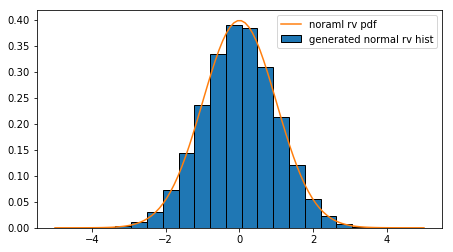

In [4]:
# Visualization

from scipy.stats import norm
x_norm = np.linspace(-5,5,100)
fig = plt.figure(figsize=(16,4))
ax_gen_norm = fig.add_subplot(1,2,1)
ax_gen_norm.hist(gen_norm_rv, bins=20,edgecolor="black", normed=True, label="generated normal rv hist")
ax_gen_norm.plot(x_norm, norm.pdf(x_norm), label="noraml rv pdf")
ax_gen_norm.legend(loc=1)
plt.show()